# Compte-Rendu

## 1. Introduction

### 1.1

Ce présent document relate le compte-rendu du sujet de Modélisation Mathématiques de la troisième année de BUT Informatique de l'IUT de Blagnac.

### 1.2 Consignes

Vous étudierez les bonnes pratiques au quotidien sur les mots de passe avec une présentation rapide d’outils de gestions comme KeePass et de plugin de navigateurs utiles.

Vous aborderez ensuite la notion de robustesse de ceux-ci avec les notions d’entropie et complexité.

Vous présenterez les principaux générateurs de nombres pseudo-aléatoires en donnant des exemples concrets dans des langages comme Python, Java ou encore des frameworks connus. Vous aborderez aussi la génération de nombres aléatoires dans les systèmes d’exploitation avec /dev/random et /dev/urandom sous Linux (voir https://lwn.net/Kernel/Index/#Random_numbers et https://www.2uo.de/myths-about-urandom/).

Vous expliquerez et conduirez des tests statistiques pour qualifier les nombres obtenus. Vous aborderez le test du khi-deux déjà vu en probas mais aussi d’autres.

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os

## 2. Sommaire


1. [Introduction](#1-introduction)

2. [Sommaire](#2-sommaire)

3. [Bonnes pratiques du quotidien ..](#3-bonnes-pratiques-du-quotidien)

    3.1 [.. en tant qu'utilisateur non aguerri](#31--en-tant-quutilisateur-non-aguerri)
    
    3.2 [Présentation d'outils de gestion de mots de passe](#32-présentation-doutils-de-gestion)
    
4. [Robustesse d'un mot de passe](#4-robustesse-des-mot-de-passe)

    4.1 [Introduction à la robustesse](#41-introduction)

    4.2 [Entropie](#42-entropie)

    4.3 [Complexité](#43-complexité)

5. [Générateurs de nombres pseudos aléatoires](#5-générateurs-de-nombres-pseudo-aléatoires)
   
   5.1 [Générateurs Congruentiels Linéaires](#51-générateurs-congruentiels-linéaires)

   5.2 [Générateurs Congruentiels Permutés](#52-générateurs-congruentiels-permutés)

6. [Génération de nombre aléatoires dans les OS](#6-génération-de-nombre-aléatoires-dans-les-systèmes-dexploitation)

    6.1 [Génération d'aléatoire dans Linux avec /dev/random](#61-linux---devrandom)

    6.2 [Génération d'aléatoire dans Linux avec /dev/urandom](#62-linux---devurandom)

    6.3 [Génération d'aléatoire dans Windows](#63-windows---cryptgenrandom)

## 3. Bonnes pratiques du quotidien..

### 3.1 .. en tant qu'utilisateur non aguerri

#### 3.1.1. Les pratiques à éviter

| Pratique                                             | Explication                                                | Exemple                                                                       |
| ---------------------------------------------------- | ---------------------------------------------------------- | ----------------------------------------------------------------------------- |
| Utiliser le même mot de passe pour plusieurs comptes | Si un compte est compromis, tous les autres le sont aussi  | Utiliser le même mot de passe pour son compte Facebook et son compte bancaire |
| Utiliser des mots de passe trop simples              | Les mots de passe simples sont plus facilement crackés     | Utiliser le mot de passe `"password"` pour ses comptes                        |
| Utiliser des mots de passe trop courts               | Les mots de passe courts sont plus facilement crackés      | Utiliser le mot de passe `"salut"` pour ses comptes                           |
| Utiliser des patterns dans les mots de passe         | Les patterns sont plus facilement crackés                  | Utiliser le mot de passe `"123456"` pour ses comptes                          |
| Utiliser des dates dans les mots de passe            | Les dates sont plus facilement crackés                     | Utiliser le mot de passe `"1998"` pour ses comptes                            |
| Utiliser des informations personnelles               | Les informations personnelles sont plus facilement crackés | Utiliser le mot de passe `"prenom.nom"` pour ses comptes                      |

#### 3.1.2. Les pratiques à adopter

| Pratique                                       | Explication                                                                       | Exemple                                                                                                     |
| ---------------------------------------------- | --------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| Utiliser un générateur de mot de passe         | Les générateurs de mot de passe génèrent des mots de passe aléatoires             | Utiliser des services navigateurs comme Firefox Lockwise ou des services en ligne comme LastPass ou KeePass |
| Utiliser un gestionnaire de mot de passe       | Les gestionnaires de mot de passe stockent les mots de passe de manière sécurisée | Utiliser différents services comme Dashlane, LastPass ou KeePass                                            |
| Utiliser la double authentification            | La double authentification permet de sécuriser les comptes                        | Utiliser la double authentification à l'aide de services comme Authy ou Google Authenticator                |
| Faire un mot de passe de plus de 12 caractères | Les mots de passe longs sont plus difficiles à crackés                            | Utiliser des mots de passe de plus de 12 caractères                                                         |

### 3.2 Présentation d'outils de gestion

#### 3.2.1 KeePass

KeePass est un gestionnaire de mot de passe open-source. Il permet de stocker des mots de passe de manière sécurisée dans une base de données chiffrée. Il est disponible sur Windows, Linux, macOS, Android et iOS.

##### 3.2.1.1 Technologies utilisées

KeePass est écrit en C# et utilise le framework .NET. Il utilise le chiffrement AES et Twofish pour chiffrer les bases de données.

**Qu'est ce que le chiffrement AES ?**

L'AES (Advanced Encryption Standard) est un algorithme de chiffrement symétrique. Il est utilisé pour chiffrer les données de la base de données de KeePass.

**Comment fonctionne l'AES ?**

L'AES fonctionne par blocs de 128 bits. Il utilise une clé de 128, 192 ou 256 bits. Il utilise 10, 12 ou 14 tours de chiffrement en fonction de la taille de la clé.

```python
def aes_encrypt(data, key):
    # Split data into 128-bit blocks
    blocks = split_into_blocks(data, 128)

    # Generate round keys
    round_keys = generate_round_keys(key)

    # Perform 10 rounds of encryption
    for i in range(10):
        # Perform SubBytes
        blocks = sub_bytes(blocks)

        # Perform ShiftRows
        blocks = shift_rows(blocks)

        # Perform MixColumns
        blocks = mix_columns(blocks)

        # Perform AddRoundKey
        blocks = add_round_key(blocks, round_keys[i])

    # Perform SubBytes
    blocks = sub_bytes(blocks)

    # Perform ShiftRows
    blocks = shift_rows(blocks)

    # Perform AddRoundKey
    blocks = add_round_key(blocks, round_keys[10])

    # Join blocks
    return join_blocks(blocks)
```

#### 3.2.2 Firefox Lockwise

Firefox Lockwise est un gestionnaire de mot de passe intégré à Firefox. Il permet de stocker des mots de passe de manière sécurisée dans une base de données chiffrée. Il est disponible sur Windows, Linux, macOS, Android et iOS. La base de données est chiffrée avec AES-256.

#### 3.2.3 Dashlane

Dashlane est un gestionnaire de mot de passe propriétaire. Il permet de stocker des mots de passe de manière sécurisée dans une base de données chiffrée. Il est disponible sur Windows, Linux, macOS, Android et iOS.
La base de données est chiffrée également avec AES-256.

_On remarque que le chiffrement AES, particulièrement AES-256, est très utilisé dans les gestionnaires de mot de passe._

## 4. Robustesse d'un mot de passe

### 4.1 Introduction

Dans la plupart des cas, les mots de passe sont stockés dans une base de données. Il est donc important de les chiffrer pour éviter qu'ils ne soient compromis en cas de fuite de données. De ce postulat on hash les mots de passe. La quasi-totalité des librairies fournissant des méthodes pour hasher un mot de passe ne fournissent que une méthode pour hasher un mot de passe, et une seconde pour comparer un texte avec un hash. L'encryption n'est alord qu'unilatérale, on ne peut pas décrypter un hash pour retrouver le mot de passe.

**Exemple :**

```javascript
// JAVASCRIPT

import { hashSync, compareSync } from "bcrypt";

// Le salage rajoute une information aléatoire au mot de passe pour éviter les attaques par dictionnaire
const saltRounds = 10;
const myPassword = "password";

// Hash le mot de passe
const hash = hashSync(myPassword, saltRounds);

// Compare le mot de passe avec le hash
const isTheGoodPassword = compareSync(myPassword, hash);
```

```javascript
// JAVASCRIPT

/**
 * @Notice
 * La méthode `compare` agit uniquement en tant que raccourcis à un code équivalent à:
 */
const compareSyncSimplified = function(hashedPass, pass) {
    const hashedInput = bcrypt.hashSync(pass, saltRounds);
    // Retourne true si les deux hash sont identiques
    return hashedInput === hashedPass;
}
```

### 4.2 Entropie

#### 4.2.1 Définition

L'entropie est une mesure de la quantité d'information contenue dans un message. Elle est exprimée en bits. Plus un message est complexe, plus son entropie est élevée.

#### 4.2.2 Calcul de l'entropie

L'entropie d'un message peut être calculée à l'aide de la formule suivante :

$$ H = - \sum\_{i=1}^{n} p_i \log_2 p_i $$

Où $p_i$ est la probabilité d'apparition du symbole $i$ dans le message.

#### 4.2.3 Exemple

Soit le message suivant :

$$ M = "abracadabra" $$
$$ n = 11 $$
$$ p*a = \frac{5}{11} $$
$$ p_b = \frac{2}{11} $$
$$ p_c = \frac{1}{11} $$
$$ p_d = \frac{1}{11} $$
$$ p_r = \frac{2}{11} $$
$$ p*{\text{espace}} = \frac{0}{11} $$
$$ p\_{\text{autres}} = \frac{0}{11} $$

$$ H = - \sum\_{i=1}^{n} p_i \log_2 p_i $$

$$ H = - \left( \frac{5}{11} \log_2 \frac{5}{11} + \frac{2}{11} \log_2 \frac{2}{11} + \frac{1}{11} \log_2 \frac{1}{11} + \frac{1}{11} \log_2 \frac{1}{11} + \frac{2}{11} \log_2 \frac{2}{11} + \frac{0}{11} \log_2 \frac{0}{11} + \frac{0}{11} \log_2 \frac{0}{11} \right) $$

$$ H = - \left( \frac{5}{11} \times -2.3219 + \frac{2}{11} \times -2.8074 + \frac{1}{11} \times -3.3219 + \frac{1}{11} \times -3.3219 + \frac{2}{11} \times -2.8074 + \frac{0}{11} \times -\infty + \frac{0}{11} \times -\infty \right) $$

$$ H = - \left( -1.0608 - 0.5116 - 0.3019 - 0.3019 - 0.5116 \right) $$

$$ H = - \left( -2.6878 \right) $$

$$ H = 2.6878 $$

L'entropie du message $M$ est de $2.6878$ bits.

**Ordre de grandeur de l'entropie**

| Entropie | Exemple                                                                        |
| -------- | ------------------------------------------------------------------------------ |
| 0        | Message composé d'un seul symbole                                              |
| 1        | Message composé de deux symboles ayant la même probabilité d'apparition        |
| 2        | Message composé de quatre symboles ayant la même probabilité d'apparition      |
| 3        | Message composé de huit symboles ayant la même probabilité d'apparition        |
| 4        | Message composé de seize symboles ayant la même probabilité d'apparition       |
| 5        | Message composé de trente-deux symboles ayant la même probabilité d'apparition |

Donc notre message $M$ a une entropie de $2.6878$ bits, ce qui est relativement faible.

#### 4.2.4 Entropie de Shannon

L'entropie de Shannon est une mesure de l'entropie d'un message. Elle est exprimée en bits. Plus un message est complexe, plus son entropie de Shannon est élevée. elle gère également le cas où un symbole n'apparait pas dans le message, c'est à dire un cas il exclut les termes relatifs aux caractères absents.

In [11]:
"""
Entropy method but here we treat the null probabilities
"""
def shannon_entropy(probabilities):
    entropy = 0
    for p in probabilities:
        if p > 0:
            entropy -= p * math.log2(p)
    return entropy

def calculate_probabilities(text):
    total_chars = len(text)
    char_counts = {}
    for char in text:
        char_counts[char] = char_counts.get(char, 0) + 1
    probabilities = [count / total_chars for count in char_counts.values()]
    return probabilities

word = "abracadabra"
probabilities = calculate_probabilities(word)
entropy = shannon_entropy(probabilities)
print("Entropie de Shannon pour '{}' : {}".format(word, entropy))

Entropie de Shannon pour 'abracadabra' : 2.0403733936884962


### 4.3 Complexité

#### 4.3.1 Définition

La complexité d'un mot de passe est une mesure de la difficulté à le deviner. Elle est exprimée en bits. Plus un mot de passe est complexe, plus sa complexité est élevée.

#### 4.3.2 Calcul de la complexité

La complexité d'un mot de passe peut être calculée à l'aide de la formule suivante :

$$ C = \log_2 \left( \frac{1}{p} \right) $$

Où $p$ est la probabilité de deviner le mot de passe.

##### 4.3.2.1 Origine de la formule simplifiée

Cette formule est une dérivéee de la formule de Shannon pour l'entropie.

Rappel :

$$ H = - \sum\_{i=1}^{n} p_i \log_2 p_i $$

Dans le contexte d'un mot de passe, la probabilité  P(xi) représente la probabilité d'occurrence de chaque caractère dans le texte. Si chaque caractère à la même probabilité d'apparition (ce qui est souvent supposé dans les modèles de mot de passe), la formule peut être simplifiée en :

$$ H(x) = -log_2 (\frac{1}{N}) $$

où N est le nombre de caractères possibles.

#### 4.3.3 Exemple

Soit le mot de passe suivant :

$$ M = "abracadabra" $$
$$ n = 11 $$
$$ p*a = \frac{5}{11} $$
$$ p_b = \frac{2}{11} $$
$$ p_c = \frac{1}{11} $$
$$ p_d = \frac{1}{11} $$
$$ p_r = \frac{2}{11} $$
$$ p*{\text{espace}} = \frac{0}{11} $$
$$ p\_{\text{autres}} = \frac{0}{11} $$

$$ C = \log_2 \left( \frac{1}{p} \right) $$
$$ C = \log_2 \left( \frac{1}{\frac{5}{11}} \right) $$
$$ C = \log_2 \left( \frac{11}{5} \right) $$
$$ C = \log_2 \left( 2.2 \right) $$
$$ C = 2.1375 $$
$$ C = 2.1375 \text{ bits} $$

La complexité du mot de passe $M$ est de $2.1375$ bits.

In [12]:
"""
Complexity method
"""
def calculate_complexity(text):
    total_chars = len(text)
    char_counts = {}
    for char in text:
        char_counts[char] = char_counts.get(char, 0) + 1
    complexity = len(char_counts) / total_chars
    return complexity

word = "abracadabra"
complexity = calculate_complexity(word)
print("Complexité pour '{}' : {}".format(word, complexity))

Complexité pour 'abracadabra' : 0.45454545454545453


**Ordre de grandeur de la complexité**

| Complexité | Exemple                                                                             |
| ---------- | ----------------------------------------------------------------------------------- |
| 0          | Mot de passe composé d'un seul symbole                                              |
| 1          | Mot de passe composé de deux symboles ayant la même probabilité d'apparition        |
| 2          | Mot de passe composé de quatre symboles ayant la même probabilité d'apparition      |
| 3          | Mot de passe composé de huit symboles ayant la même probabilité d'apparition        |
| 4          | Mot de passe composé de seize symboles ayant la même probabilité d'apparition       |
| 5          | Mot de passe composé de trente-deux symboles ayant la même probabilité d'apparition |

Donc notre mot de passe $M$ a une complexité de $2.1375$ bits, ce qui est relativement faible.

## 5. Générateurs de nombres pseudo-aléatoires

**Lexique :**

- `PRNG` - Pseudo-Random-Number-Generator (_Générateur de nombres pseudos-aléatoires_)
- `LGC` - Linear Congruential Generators (_Générateurs congruentiels linéaires_)
- `PCG` - Permuted Congruential Generators (_Générateurs congruentiels permutés_)

### 5.1 Générateurs congruentiels linéaires

#### 5.1.1 Définition

Le générateur congruentiel linéaire est un des plus anciens générateurs de nombres pseudo-aléatoires mais pour autant très simple à comprendre; il est basé sur une suite récurrente linéaire définie par la relation de récurrence suivante :

$$ X\_{n+1} = (aX_n + c) \mod m $$

C'est à dire :

- Multiplier le nombre précédent par un nombre $a$.
- Ajouter un nombre $c$.
- Prendre le reste de la division euclidienne par un nombre $m$.

3, 9, 27, 81, 243, 217, 139, 161, 227, 169, 251, 241, 211, 121, 107, 65, 195, 73, 219, 145, 179, 25, 75, 225, 163, 233, 187, 49, 147, 185, 43, 129, 131, 137, 155, 209, 115, 89, 11, 33, 99, 41, 123, 113, 83, 249, 235, 193, 67, 201, 91, 17, 51, 153, 203, 97, 35, 105, 59, 177, 19, 57, 171, 1, 3, 9, 27, 81, 243, 217, 139, 161, 227, 169, 251, 241, 211, 121, 107, 65, 195, 73, 219, 145, 179, 25, 75, 225, 163, 233, 187, 49, 147, 185, 43, 129, 131, 137, 155, 209
Power_divergenceResult(statistic=768.0, pvalue=7.8511564419325045e-53)


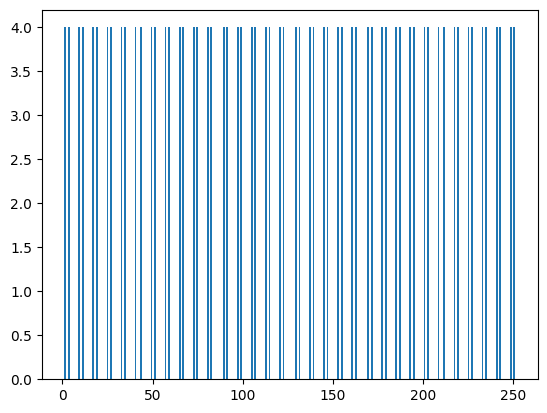

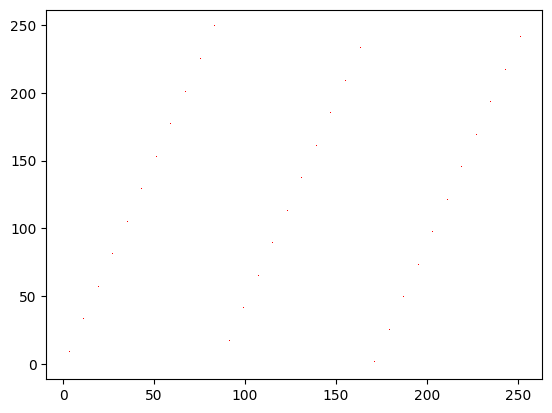

In [13]:
def lcg_lehman(seed, a = 3, c = 0, m = 2**8):
    """Lehman 1951 LCG generator"""
    while True:
        # multiply by 3 to get next value from previous
        seed = (a * seed + c) % m
        yield seed

# seed generator with val: 1 and print first 100 values with a = 3, c = 0, m = 2**8 = 256 to get a 8-bit number
lehman = lcg_lehman(1)
print(', '.join([str(next(lehman)) for x in range(0, 100)]))

import matplotlib.pyplot as plt
from scipy.stats import chisquare

# seed generator with val: 1 and print first 100 values with a = 3, c = 0, m = 2**8 = 256 to get a 8-bit number
lehman = lcg_lehman(1)

histo = plt.hist([next(lehman) for x in range(0, 256)], bins = 256)
print(chisquare(histo[0]))
plt.show()

coord = []
for i in range(0, 100000):
    x = next(lehman)
    y = next(lehman)
    coord.append((x, y))

histo = plt.plot([x[0] for x in coord], [x[1] for x in coord], 'r,')
plt.show()

Avec le LCG, on peut remarquer certains problèmes :

- Tous les nombres sont impairs, nous ne touchons donc pas du tout uniformément tous les nombres (tout modèle observable étant l'antithèse du hasard).

- La taille de l'échantillon est très limitée - on peut remarquer qu'on boucle sur les mêmes nombres.

Tous ces problèmes sont issues des paramètres entrés dans le LCG. C'est ici qu'intervient sa version plus récente qu'est le LCG Drand48 qui est utilisée par la librairie ``java.utils.Random``.

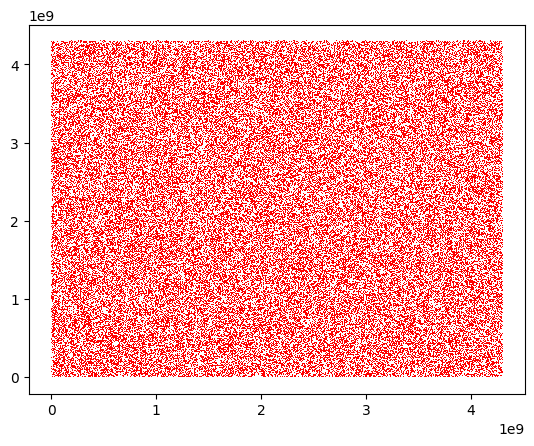

3721.0
Power_divergenceResult(statistic=260.747776, pvalue=0.38893368507204973)


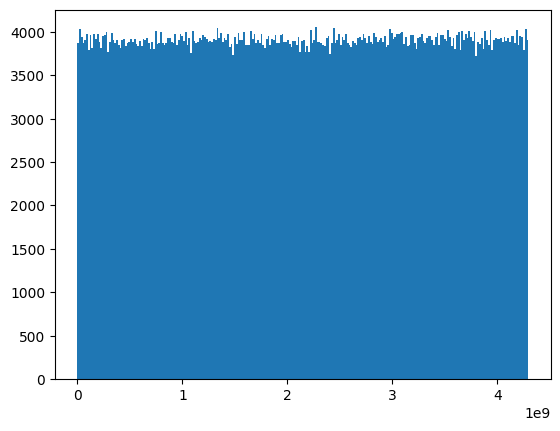

In [14]:
def lcg_drand48(seed):
    """drand48 1983 LCG generator"""
    while True:
        # wrap int around to have max 48 bits
        seed = (seed * 252149039917 + 11) & (2**48 - 1)
        # don't output the seed but a function on it
        yield seed >> 16

# seed generator with val: 1 and print first 100 values
drand48 = lcg_drand48(1)

coord = []
for i in range(0, 100000):
    x = next(drand48)
    y = next(drand48)
    coord.append((x, y))

histo = plt.plot([x[0] for x in coord], [x[1] for x in coord], 'r,')
plt.show()

histo = plt.hist([next(drand48) for x in range(0, 1000000)], bins = 256)
print (min(histo[0]))
print(chisquare(histo[0]))

Dans le `Drand48 LCG`, nous n'obtenons pas seulement le numéro suivant dans la séquence, ici nous décalons tous les bits de 16 places vers la droite, les 16 bits les plus à droite étant supprimés en conséquence.

Exemple de shift de bits :


> Si nous avons `1017 >> 3`
> 
>   1017 = 11 1111 1001 en base 2
>
>   Avec le shift de 3 bits vers la droite, nous obtenons : 111 1111
>
>  qui représente 127 en base 10
>
> Le shift de bits aide à avoir un générateur 16 bits avec une sortie de 8 bits


### 5.2 Générateurs congruentiels permutés

#### 5.2.1 Définition

Le générateur congruentiel permuté est une amélioration du générateur congruentiel linéaire. Il est basé sur une suite récurrente linéaire définie par la relation de récurrence suivante :

$$ X\_{n+1} = (aX_n + c) \mod m $$

C'est à dire :

- Multiplier le nombre précédent par un nombre $a$.
- Ajouter un nombre $c$.
- Prendre le reste de la division euclidienne par un nombre $m$.
- Permuter les bits du résultat.

#### 5.2.2 Explication

Dans ``numpy 1.17``, la notion de PCGs a été introduite avec l'algorithme de _Mersenne Twister_, spécifiquement pour le variant _MT19937_. C'est un générateur en 32 bits, également avec un sorti de 32 bits.

L'idée derrière le PGC est:

- Produire une fonction de l'état plutôt que l'état directement semble augmenter l'aléatoire.
- Les générateurs linéaires congruents (LGC) manquent clairement d'aléatoire dans les bits les moins significatifs (graphique en haut à gauche), mais les bits les plus significatifs ont tendance à être 'plus aléatoires' (graphique en bas à droite).
- Si nous avons par exemple un état de 16 bits pour produire un nombre de 8 bits, alors nous n'avons besoin de choisir que 8 bits à produire.
- Pourquoi ne pas utiliser les bits les plus significatifs de l'état de 16 bits, qui sont les plus aléatoires, pour choisir quelle fonction appliquer au reste de l'état de 16 bits afin de générer la sortie de 8 bits.
- En d'autres termes, utilisons la partie la plus aléatoire de notre état pour sélectionner de manière aléatoire une fonction de transformation à appliquer au reste de l'état - un algorithme randomisé en quelque sorte.

La famille des PCGs utilise différentes transformations :
- Décalage de bits
- Rotation de bits
- XOR de bits

Ces transformations sont utilisées et combinées pour créer plusieurs PCG, tels que le PCG XSH-RS (xorshift, décalage aléatoire) et le PCG XSL-RR (xorshift, rotation aléatoire), qui est utilisé dans Numpy, notamment le PCG XSL RR 128/64.

Power_divergenceResult(statistic=2.894336, pvalue=1.0)


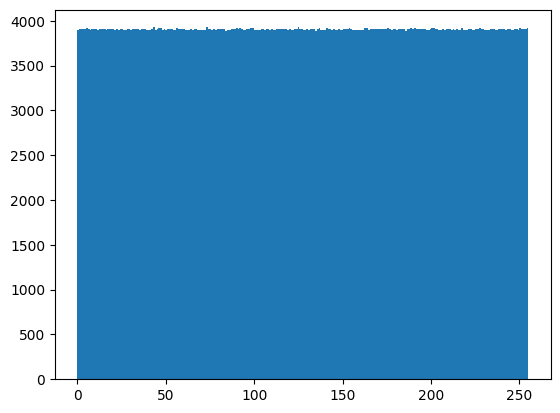

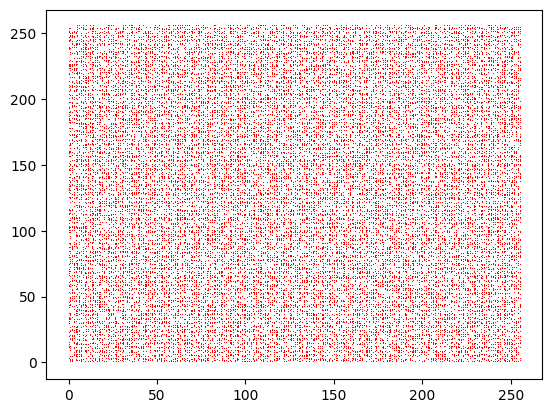

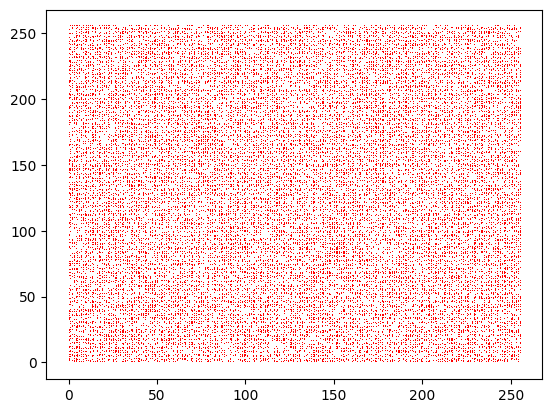

Power_divergenceResult(statistic=3.4836479999999996, pvalue=1.0)


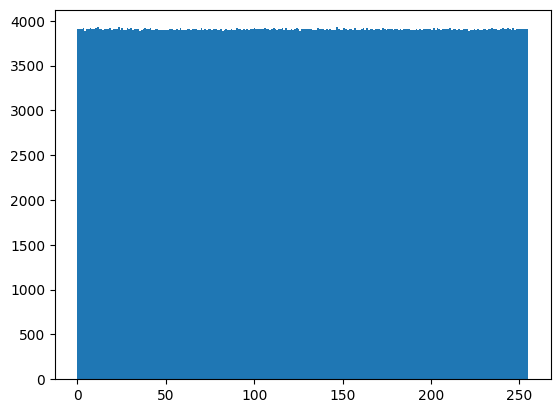

In [15]:
m = 2**16
a = 4 * 4321 + 1
c = 8671
s = 5423

def rotr(x, r, b):
    """
    Rotates bits in a b bit integer, x, right by r places
    e.g. if we pass x = 30 and r = 2 then we have
    bin(x) = 11110 so rotr(30, 2) = 10111
    i.e. shift everything to the right
    """
    # checker to ensure rotation is within bit size
    if r == b:
        return x
    elif r > b:
        r = r % b
    # make input have b bits, then shift to right
    # this will form our lower/bottom bits of new number
    bottom = (x & (2**b - 1)) >> r
    # shift knocked off bits to top (left-side)
    top = x << (b - r)
    top = top & (2**b - 1)
    # put together
    return top | bottom


def xor_rr(x, r, b):
    """Conducts a bitwise xor then rotate on b-bit length integer x"""
    # take the top r bits to define our rotation
    c = x >> (b*2 - r)
    # bitwise shift the others by 6 and take xor
    x ^= x >> ((b*2 - (-r) - (b - r)) // 2)
    # rotate and return
    return rotr(x, c, 8)


def xor_rs(x, r, b):
    """Conducts a bitwise xor then shift on b-bit length integer x"""
    # take the top r bits to define our shift
    c = x >> (b*2 - r)
    # bitwise shift the others by 6 and take xor
    x ^= x >> ((b*2 - (-r) - (b - r)) // 2)
    # shift and return
    return (x >> (8 - 2 - c)) & (2**8 - 1)


def pcg_xor_rr_16(m, a, c, r, s):
    """16 bit PCG-XOR-RR generator with 8-bit output"""
    while True:
        # compute state
        s = (a * s + c) % m
        # manipulate state to output
        yield xor_rr(s, r, 8)


def pcg_xor_rs_16(m, a, c, r, s):
    """16 bit PCG-XOR-RS generator with 8-bit output"""
    while True:
        # compute state
        s = (a * s + c) % m
        # manipulate state to output
        yield xor_rs(s, r, 8)

pcg_xor_rs = pcg_xor_rs_16(m, a , c, 2, s)
pcg_xor_rr = pcg_xor_rr_16(m, a , c, 2, s)

# plot the number of time we get each number of the first 100 values
histo = plt.hist([next(pcg_xor_rs) for x in range(0, 1000000)], bins = 256)
print(chisquare(histo[0]))
plt.show()

coord = []
for i in range(0, 1000000):
    x = next(pcg_xor_rs)
    y = next(pcg_xor_rs)
    coord.append((x, y))
    # x = y

histo = plt.plot([x[0] for x in coord], [x[1] for x in coord], 'r,')
plt.show()



coord = []
for i in range(0, 1000000):
    x = next(pcg_xor_rr)
    y = next(pcg_xor_rr)
    coord.append((x, y))

histo = plt.plot([x[0] for x in coord], [x[1] for x in coord], 'r,')
plt.show()

# plot the number of time we get each number of the first 100 values
histo = plt.hist([next(pcg_xor_rr) for x in range(0, 1000000)], bins = 256)
print(chisquare(histo[0]))

## 6. Génération de nombre aléatoires dans les systèmes d'exploitation

### 6.1 Linux - /dev/random

#### 6.1.1 Définition

`/dev/random` est un générateur de nombres aléatoires disponible sur les systèmes d'exploitation de type Unix. Il est basé sur une source d'entropie, c'est à dire un générateur de nombres aléatoires. Il est disponible sur les systèmes d'exploitation de type Unix.

#### 6.1.2 Fonctionnement

Le fonctionnement général peut être décrit comme suit :

- 1. **Collecte de l'entropie** : Le système Unix collecte de l'entropie à partir de diverses sources, telles que les mouvements de la souris, les frappes au clavier, les mouvements du disque dur, activité du réseau, variation de temps dans l'horloge système etc.. . Ces sources sont des événements physiques difficiles à prédire.

- 2. **Piscine d'entropie** : L'entropie collectée est ajoutée à une piscine d'entropie. Cette piscine est utilisée comme base pour générer des nombres aléatoires.

- 3. **Génération de nombres aléatoires** : Lorsque /dev/random est lu, le générateur utilise la piscine d'entropie pour produire des nombres aléatoires. Un algorithme cryptographique fort est souvent utilisé pour garantir la qualité des nombres générés.

In [22]:
# Lancement uniquement sous linux

def generate_random_bytes(length):
    with open('/dev/random', 'rb') as random_source:
        random_bytes = random_source.read(length)
    return random_bytes

# Si nous ne sommes pas sous linux
if os.name != 'posix':
    print("Not under linux")
    exit(1)
else:
    random_data = generate_random_bytes(16)
    print(random_data)


Not under linux


Le tout vient clairement souligner l'incapacité de l'ordinateur à générer des nombres aléatoires au sens propre du terme, et donc l'importance de l'entropie dans son environnement.

#### 6.1.3 Entropie

$$ H{avail} = H{pool} - H{est} $$

- $H{avail}$ : Entropie disponible
- $H{pool}$ : Entropie dans la piscine
- $H{est}$ : Entropie estimée

Il est difficile d'estimer l'entropie d'un système, car cela dépend de la manière dont le noyau Linux agrège les données. Le noyau utilise ensuite ces données pour actualiser la piscine d'entropie.

La commande suivante peut être utilisée pour afficher l'entropie actuelle disponible dans le noyau Linux. Cette valeur est un nombre entier qui représente l'entropie en bits.
    
```bash
cat /proc/sys/kernel/random/entropy_avail
```

#### 6.1.4 Limite de /dev/random

En cas de manque d'entropie dans la piscine, /dev/random peut bloquer les appels de lecture jusqu'à ce que suffisamment d'entropie soit disponible. Cela peut entraîner un blocage de l'application.

### 6.2 Linux - /dev/urandom

#### 6.2.1 Définition

`/dev/urandom` est un générateur de nombres aléatoires disponible sur les systèmes d'exploitation de type Unix avec le même fonctionnement que `/dev/random`.

#### 6.2.2 Fonctionnement

Comme évoqué précedemment, /dev/urandom fonctionne de manière similaire à /dev/random mais n'est pas bloquant, et s'appuiera sur des algorithmes cryptographiques pour générer des nombres aléatoires. Les algorithmes utilisés sont les suivants :

- **AES-256** : Advanced Encryption Standard
- **SHA-1** : Secure Hash Algorithm
- **SHA-256** : Secure Hash Algorithm
- **SHA-512** : Secure Hash Algorithm
- **Whirlpool** : Whirlpool Hash Function

#### 6.2.3 Entropie

Son entropie est moindre comparé à /dev/random, mais il est plus rapide et ne bloque pas les appels de lecture.

### 6.3 Windows - CryptGenRandom

#### 6.3.1 Fonctionnement


Sur les systèmes Windows, la génération de nombres aléatoires est généralement effectuée en utilisant la fonction CryptGenRandom fournie par l'API Cryptographic Service Provider (CSP) de Windows. Cette fonction est utilisée pour générer des données cryptographiquement sécurisées, notamment des nombres aléatoires.

In [ ]:
import ctypes
from ctypes import WinDLL, byref, c_uint

ADVAPI32 = WinDLL('advapi32')

# Nécessite les permissions administrateur pour fonctionner
def generate_random_bytes(length):
    buffer = (ctypes.c_byte * length)()
    result = ADVAPI32.CryptGenRandom(ctypes.c_ulong(1), ctypes.c_ulong(length), buffer)
    if not result:
        raise ValueError("Erreur lors de la génération de nombres aléatoires")
    return bytes(buffer)

# Utilisation
if os.name != 'nt':
    print("Not under windows")
    exit(1)
else:
    random_data = generate_random_bytes(16)
    print(random_data)


6.3.2 CryptGenRandom

La fonction CryptGenRandom est utilisée pour générer des données cryptographiquement sécurisées, notamment des nombres aléatoires. La fonction est implémentée dans l'API Cryptographic Service Provider (CSP) de Windows. La fonction est disponible sur les systèmes Windows 2000 et supérieurs. Elle trouve son entropie dans les sources suivantes :
- **Horloge système** : L'horloge système est utilisée pour générer des nombres aléatoires.
- - e.g : `GetSystemTime()` qui retourne l'heure actuelle en millisecondes.
- **Horloge processeur** : L'horloge processeur est utilisée pour générer des nombres aléatoires.
- - e.g : `QueryPerformanceCounter()` qui retourne le nombre de cycles d'horloge écoulés depuis le démarrage du système.
- **Horloge haute résolution** : L'horloge haute résolution est utilisée pour générer des nombres aléatoires.
- - e.g : `GetTickCount()` qui retourne le nombre de millisecondes écoulées depuis le démarrage du système.

Ces valeurs sont ensuite combinées pour générer des nombres aléatoires.

CryptGenRandom repose également sur les évènements imprévisibles tel que les mouvements de la souris, les frappes au clavier etc.. mais n'est pas bloquant quand bien même l'entropie serait faible.

#### 6.3.3 Entropie

L'entropie de la fonction CryptGenRandom est estimée à 160 bits d'après [Microsoft](https://docs.microsoft.com/en-us/windows/win32/api/wincrypt/nf-wincrypt-cryptgenrandom).



## 7. True Random Number Generator

Lexique :

- `TRNG` - True Random Number Generator (_Générateur de nombres aléatoires véritables_)

## 8. Public Key Cryptographic Standards (PKCS#14)